In [1]:
setwd("..")

In [2]:
source("Source/functions.R")

In [3]:
library("data.table")
library("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Attaching package: ‘S4Vectors’

The following objects are masked from ‘package:data.table’:

    first, second

The following object is masked from ‘package:utils’:

    findMatches

The following objects are masked from ‘package:base’:

    expand.grid, I, unname

Loading required package: IRanges

Attaching package: 

In [4]:
SampleInfo <- fread("Data/SampleInfo.csv")

sampleIDs <- SampleInfo[, SampleID]
SampleInfo[, Type := factor(SampleInfo[, Type], levels = c("N", "S", "M", "T"))]
SampleInfo[, IsResponsive := ifelse(SampleInfo[, Type] == "N", "N", "Y")]

sampleGroups <- c("N", "S", "M", "T")

groupColors <- c(N = "#888888", 
                 S = rgb(red = 0, green = 128/255, blue = 225/255),
                 M = rgb(red = 255/255, green = 255/255, blue = 0), 
                 T = rgb(red = 255/255, green = 0, blue = 255/255)
)

sampleColors <- groupColors[SampleInfo[J(sampleIDs), as.character(Type), on = "SampleID"]]
names(sampleColors) <- sampleIDs

In [5]:
cnts_exon <- read.csv("Data/cnts_exon.csv.gz", row.names = 1, as.is = TRUE)
cnts_intron <- read.csv("Data/cnts_intron.csv.gz", row.names = 1, as.is = TRUE)

In [6]:
eset_exon <- DESeqDataSetFromMatrix(countData = cnts_exon, colData = data.frame(Type = SampleInfo[, Type], row.names = SampleInfo[, SampleID]), design = ~ Type)
eset_exon <- estimateSizeFactors(eset_exon)
eset_exon <- vst(eset_exon)
exprs_exon <- assay(eset_exon)

In [7]:
eset_intron <- DESeqDataSetFromMatrix(countData = cnts_intron, colData = data.frame(Type = SampleInfo[, Type], row.names = SampleInfo[, SampleID]), design = ~ Type)
eset_intron <- estimateSizeFactors(eset_intron)
eset_intron <- vst(eset_intron)
exprs_intron <- assay(eset_intron)

In [8]:
assay(eset_exon) |> head()

,J150_3,J151_5,J153_6,J154_8,J155_9,J156_16,J161_9,J162_16,J163_18,J164_19,⋯,J172_23,J173_25,J174_13,J175_18,J176_25,J182_2,J183_1,J185_4,J186_5,J187_6
0610005C13Rik,5.211427,5.559550,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,⋯,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427
0610007N19Rik,7.653429,8.588211,7.693173,8.180451,6.946870,7.239355,8.643996,6.449715,5.211427,8.606597,⋯,8.272698,7.936338,6.786962,6.418709,7.277168,7.501946,7.996262,8.361097,10.493407,7.690068
0610007P14Rik,8.393783,7.360938,9.684503,9.607533,9.956501,7.891905,9.521982,14.861159,9.217786,8.133458,⋯,7.462909,9.303996,9.497717,9.094859,9.125502,9.162752,8.949723,10.497073,9.671064,9.947930
0610008F07Rik,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,⋯,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427
0610009B14Rik,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,⋯,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427,5.211427
0610009B22Rik,11.023413,11.504211,9.927139,9.000065,8.950977,10.406907,7.333648,12.493766,12.181366,5.662299,⋯,8.519207,9.337284,9.872860,9.842700,9.412019,9.553788,9.165560,10.236356,11.861634,7.374601


In [9]:
pca_exon <- prcomp(t(exprs_exon[apply(exprs_exon, 1, sd) > 0, ]), scale = TRUE)
pca_intron <- prcomp(t(exprs_intron[apply(exprs_intron, 1, sd) > 0, ]), scale = TRUE)

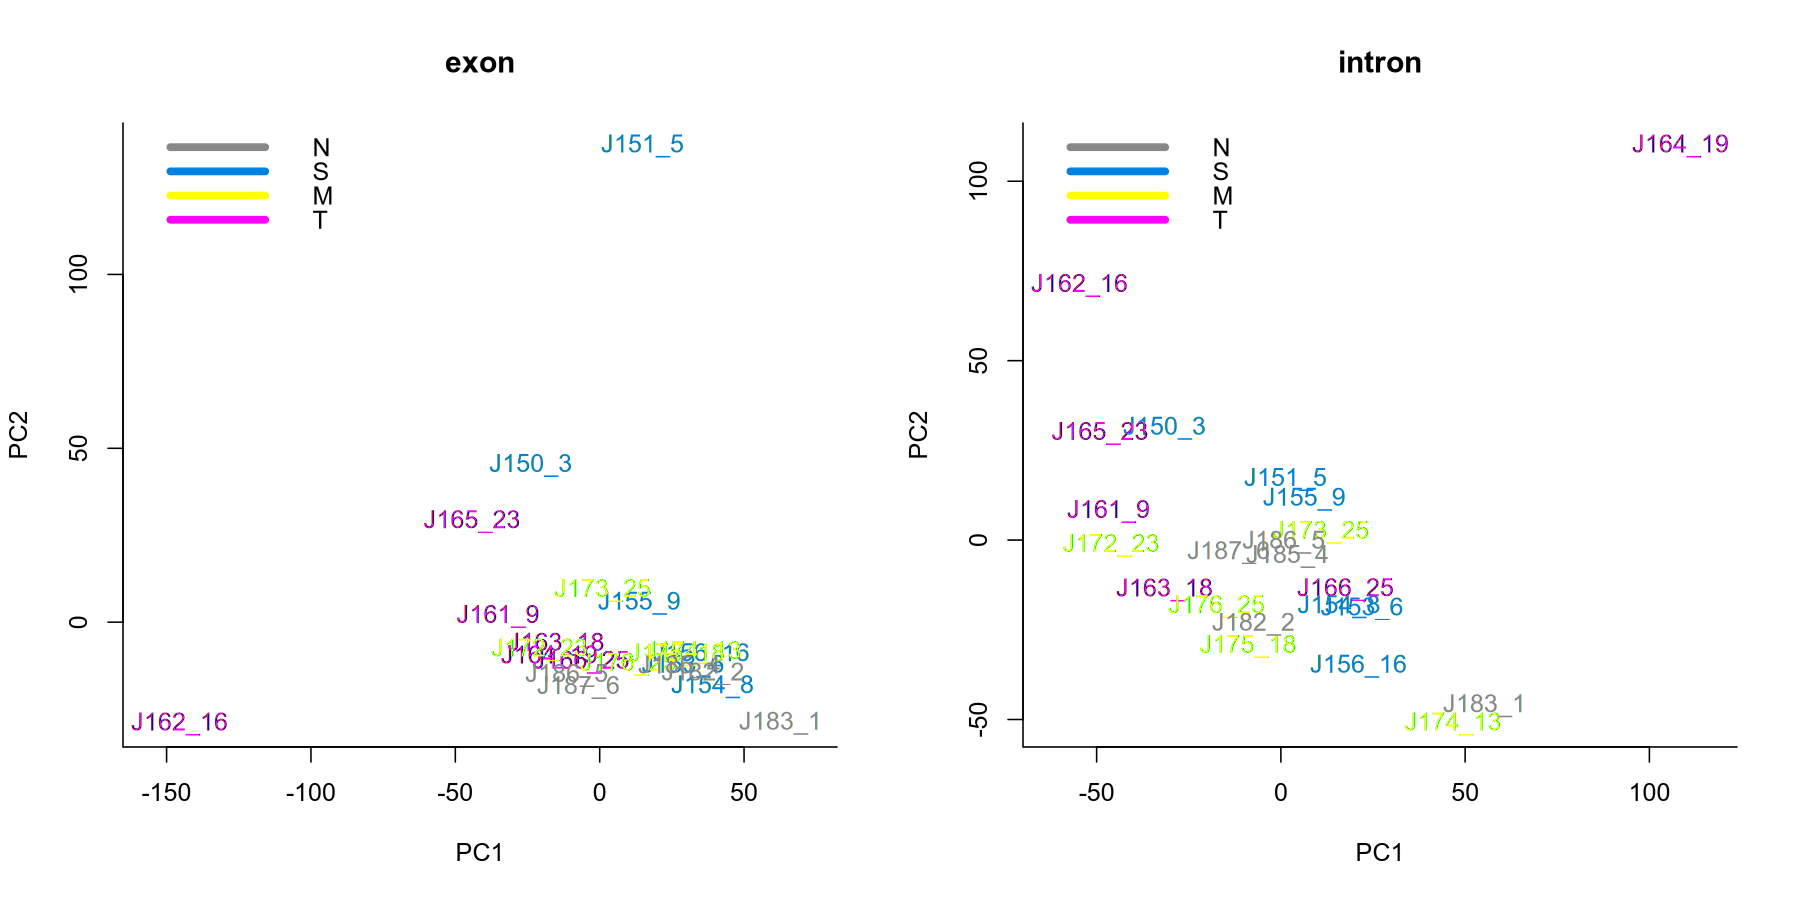

In [10]:
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 150)
par(ps = 12, mfrow = c(1, 2), bty = "L")
plot(pca_exon$x, type = "n", main = "exon", xlim = c(min(pca_exon$x[, 1]) - diff(range(pca_exon$x[, 1])) * 0.05, max(pca_exon$x[, 1]) + diff(range(pca_exon$x[, 1])) * 0.05))
text(pca_exon$x, label = rownames(pca_exon$x), col = sampleColors[rownames(pca_exon$x)], cex = 1)
legend("topleft", legend = sampleGroups, col = groupColors, lwd = 5, box.col = NA)
plot(pca_intron$x, type = "n", main = "intron", xlim = c(min(pca_intron$x[, 1]) - diff(range(pca_intron$x[, 1])) * 0.05, max(pca_intron$x[, 1]) + diff(range(pca_intron$x[, 1])) * 0.05))
text(pca_intron$x, label = rownames(pca_intron$x), col = sampleColors[rownames(pca_intron$x)], cex = 1)
legend("topleft", legend = sampleGroups, col = groupColors, lwd = 5, box.col = NA)

In [11]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-pc-linux-gnu
Running under: openSUSE Tumbleweed

Matrix products: default
BLAS:   /home/lenovo/Applications/R/4.4.0/lib64/R/lib/libRblas.so 
LAPACK: /home/lenovo/Applications/R/4.4.0/lib64/R/lib/libRlapack.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] DESeq2_1.44.0               SummarizedExperiment_1.34.0
 [3] Biobase_2.64.0              MatrixGenerics_1.16.0      
 [5] matrixStats_1.4.1           Genom